In [1]:
import pandas as pd
import numpy as np
import math
df = pd.read_csv("/content/AAPL_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=["Date"])

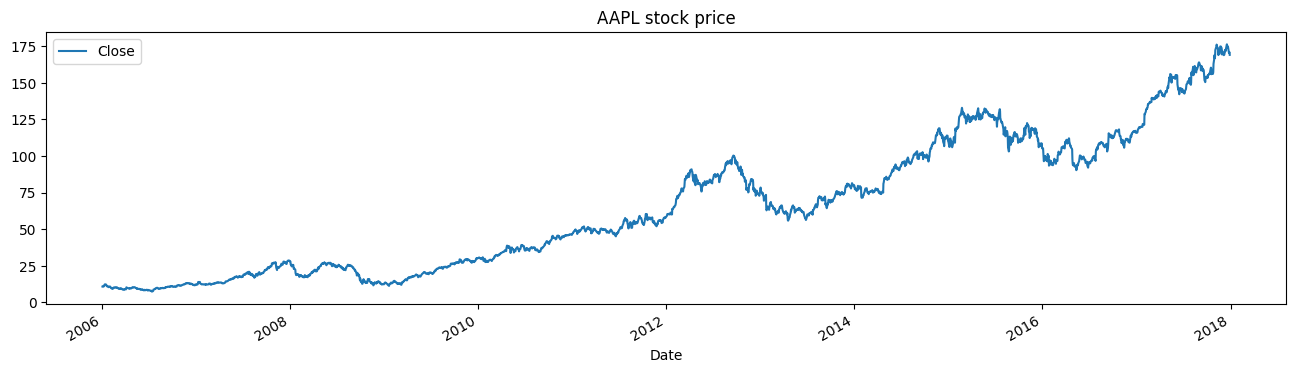

In [2]:
import matplotlib.pyplot as plt
df["Close"].plot(figsize=(16, 4), legend=True)
plt.title('AAPL stock price')
plt.show()

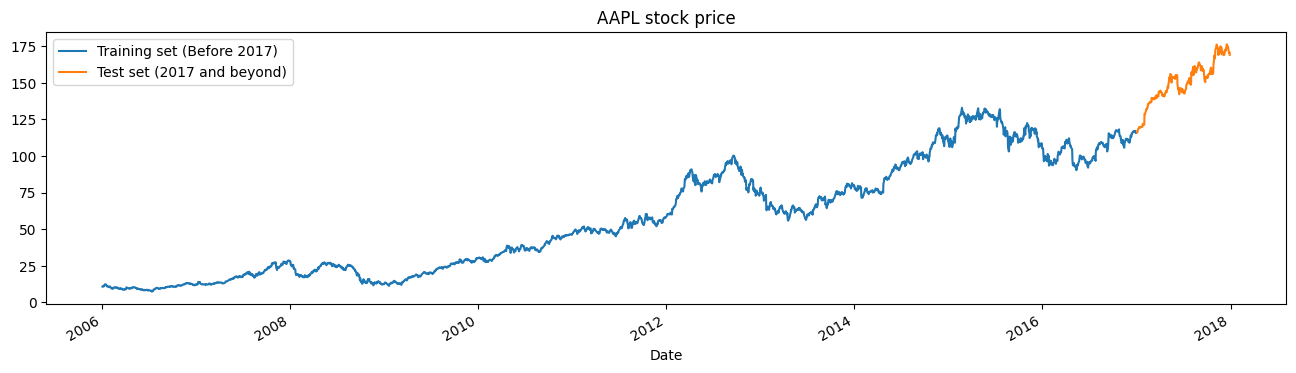

In [3]:
import matplotlib.pyplot as plt
# Plot the training set
df["Close"][:'2016'].plot(figsize=(16, 4), legend=True)
# Plot the test set
df["Close"]['2017':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'])
plt.title('AAPL stock price')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(trainning_set)

In [9]:
# here we are seperating the data
trainning_set = df[:'2016'].iloc[:,1:2].values
test_set = df['2017':].iloc[:,1:2].values

X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i - 60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

In [11]:
regressor.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
85/85 [==============================] - 23s 145ms/step - loss: 0.0189
Epoch 2/5
85/85 [==============================] - 12s 146ms/step - loss: 0.0053
Epoch 3/5
85/85 [==============================] - 12s 146ms/step - loss: 0.0054
Epoch 4/5
85/85 [==============================] - 12s 142ms/step - loss: 0.0050
Epoch 5/5
85/85 [==============================] - 12s 144ms/step - loss: 0.0052


In [12]:
# pre-processing the data
dataset_total = pd.concat((df["Close"][:'2016'],df["Close"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# making the test data
X_test = []
for i in range(60,len(inputs)):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 41ms/step


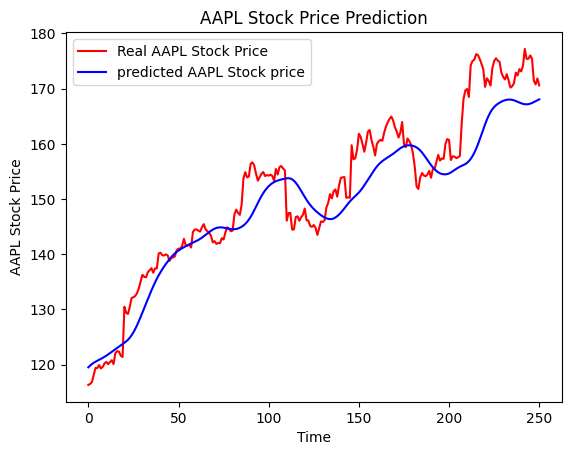

In [13]:
def plot_prediction(test,prediction):
    plt.plot(test,color='red',label="Real AAPL Stock Price")
    plt.plot(prediction, color="blue",label="predicted AAPL Stock price")
    plt.title("AAPL Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("AAPL Stock Price")
    plt.legend()
    plt.show()
# now we'll use this function to visualize our test and predicted data

plot_prediction(test_set,predicted_stock_price)

In [14]:
from sklearn.metrics import mean_squared_error
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test,predicted))
    print("The root mean sqaured error is {}.".format(rmse))

In [15]:
return_rmse(test_set,predicted_stock_price)

The root mean sqaured error is 5.50029269671381.


In [16]:
returns = []
def calculate_returns(stock_prices):


    for i in range(1, len(stock_prices)):
        previous_price = stock_prices[i - 1]
        current_price = stock_prices[i]
        daily_return = (current_price - previous_price) / previous_price
        returns.append(daily_return)

    return returns

In [17]:
returns1 = []
def calculate_returns1(stock_prices):


    for i in range(1, len(stock_prices)):
        previous_price = stock_prices[i - 1]
        current_price = stock_prices[i]
        daily_return = (current_price - previous_price) / previous_price
        returns1.append(daily_return)

    return returns1

In [18]:
# return=returns[:500]
print(returns[:500])

[]


In [19]:
calculate_returns(predicted_stock_price)

calculate_returns1(test_set)

[array([0.00154732]),
 array([0.00300403]),
 array([0.01112442]),
 array([0.01074814]),
 array([-0.00041866]),
 array([0.00460714]),
 array([-0.00525306]),
 array([0.00268231]),
 array([0.00518308]),
 array([0.00216234]),
 array([-0.00340249]),
 array([0.00299775]),
 array([0.00298879]),
 array([-0.005877]),
 array([0.01665279]),
 array([0.0027846]),
 array([-0.00073505]),
 array([-0.00588476]),
 array([-0.0019732]),
 array([0.07496499]),
 array([-0.00842976]),
 array([-0.00154571]),
 array([0.0101401]),
 array([0.01218391]),
 array([0.00098418]),
 array([0.00166389]),
 array([0.00377529]),
 array([0.00661953]),
 array([0.00949036]),
 array([0.00873492]),
 array([-0.0027152]),
 array([-0.00051508]),
 array([0.00677317]),
 array([0.00270567]),
 array([0.00262544]),
 array([-0.0059645]),
 array([0.0057076]),
 array([0.]),
 array([0.01971769]),
 array([0.00092758]),
 array([-0.00320787]),
 array([-0.00042909]),
 array([0.00150247]),
 array([-0.0012859]),
 array([-0.00722461]),
 array([0.0

In [20]:
print(len(returns1))

250


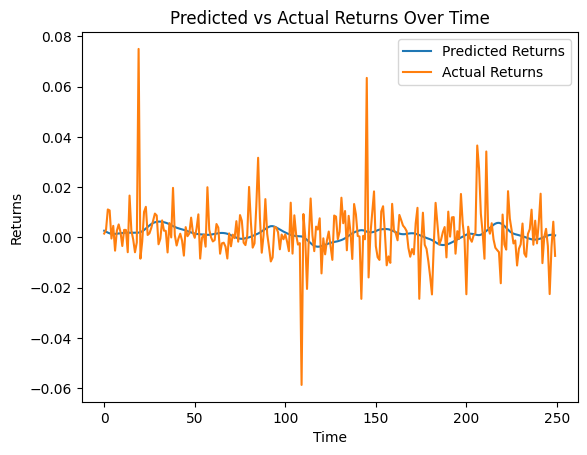

In [21]:
import matplotlib.pyplot as plt

# Assuming predicted_array contains the predicted returns and actual_returns contains the actual returns
plt.plot(returns[:250], label='Predicted Returns')
plt.plot(returns1, label='Actual Returns')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Predicted vs Actual Returns Over Time')
plt.legend()
plt.show()
